# Pandas interactive

## Imports

Pandas is not part of Python itself, but a **package** written by Python users.  
Those packages need to be installed (this is what we did on Monday).  
After they are installed, you need to **import** the package in order for it to be usable.   

In [10]:
import pandas as pd

### Reading data

We are going to start with reading in data from a file.  
This first dataset gives us information about Penguins that were investigated during 2007-2009.  
The data is saved in the `csv` format, which stands for `comma separated values`.  
To see how that looks like, here is a part of the first file we are looking at
```
species,island,bill_length_mm
Adelie,Torgersen,39.1
Adelie,Torgersen,39.5
```


<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/culmen_depth.png" style="max-width: 500px">



We can use the pandas method `pandas.read_csv` to download and then read this file and save it into a variable `df`.  

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


The object that we assigned to the variable `df` is called a `DataFrame`, which we can see by checking the **type** of the variable.

In [12]:
type(df)

pandas.core.frame.DataFrame

## Indexing

A `DataFrame` is a bit like a spreadsheet, but much more powerful.  
When you want to access the data inside, there are now **two** indexes you have to specify: the row and the column

Let's first start with the **row**.  
Similarly to `lists` you index using square brackets and the *index*.  
However, you have to write `.loc` before that, as otherwise pandas tries to index the *columns*.  

In [13]:
df.loc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm          181
body_mass_g               3750
sex                       male
year                      2007
Name: 0, dtype: object

Exactly the same is true if you want a *slice*

In [14]:
df.loc[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


### Exercise

Of which species are the penguins 220 - 225? On which island were they caught?

In [15]:
df.loc[220:225]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
220,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,female,2008
221,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,male,2008
222,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,female,2008
223,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,male,2008
224,Gentoo,Biscoe,48.2,15.6,221.0,5100.0,male,2008
225,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,female,2008


In [16]:
df.loc[220:225, ["species", "island"]]

,species,island
220,Gentoo,Biscoe
221,Gentoo,Biscoe
222,Gentoo,Biscoe
223,Gentoo,Biscoe
224,Gentoo,Biscoe
225,Gentoo,Biscoe


Now we will take a look at the **columns**.  
Instead of using a *number*, you can directly use the *name* of the column.  
Let's try that for the species column.  


In [17]:
df["species"]

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 344, dtype: object

With that, we can already get a lot of information out of the data.  
Let's try with counting how many distinct species we have found.  
We can do that using the `value_counts` method.  

In [18]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Exercise

How often were the penguins found on the different islands?  

Hint: If you forgot the names of the columns you can always write `df.columns` to get a list of them.  
This is also very handy to copy them to avoid spelling mistakes.  

In [19]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [20]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [21]:
df["sex"].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [22]:
df["body_mass_g"].value_counts()

3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4275.0     1
5750.0     1
6300.0     1
3275.0     1
4375.0     1
Name: body_mass_g, Length: 94, dtype: int64

## Bar plot

Those numbers on their own are interesting, but not the best way to communicate them.  
Let's plot them instead using a **bar plot**.  
As before, we first calculate how many turtles of each species we have using `value_counts`.  
Then we can plot that using the `plot` method, where we specify the kind of plot we want to have using `kind="bar"`.  

Note that to make it easier to read I added line breaks after each operation.  
In Python you can only do that if you put the code into parentheses `()`

<AxesSubplot:>

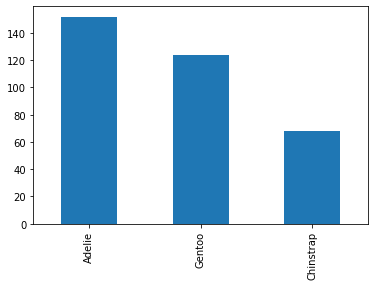

In [23]:
(
    df["species"]
    .value_counts()
    .plot(kind="bar")
)

### Exercise

Plot how many penguins were found on each of the islands

<AxesSubplot:>

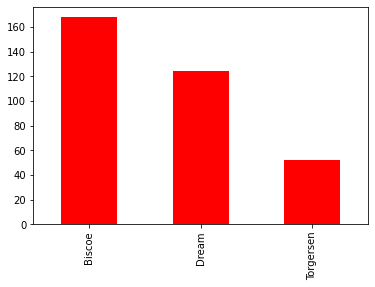

In [24]:
from turtle import color


(
    df["island"]
    .value_counts()
    .plot(kind="bar" , color= "r")
)

## Histogram

Let's take a look at the data again.  

In [16]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In the fourth row we can see that some of the values are `NaN`, which stands for "not a number".  
These are used to indicate missing values in a dataset.  
As they are of little use to us now, we will remove them using `dropna`

In [17]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Now that our data is nice and clean, let's take a look at the numerical information in here.  
Let's first explore the bill length of the penguins.  
As we have more than 300 data points, the best way to study them is with a plot.  
To get a feeling of how they are *distributed*, we are going to plot a histogram using `plot(kind="hist")`

<AxesSubplot:ylabel='Frequency'>

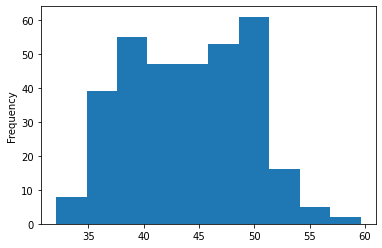

In [18]:
(
    df["bill_length_mm"]
    .plot(kind="hist")
)

Imagine you saw the plot above in someone elses work, would you be satisfied with it?  
No! It is lacking a label for the x-axis and a title!  
Let's fix that.

Text(0.5, 0, 'Length (mm)')

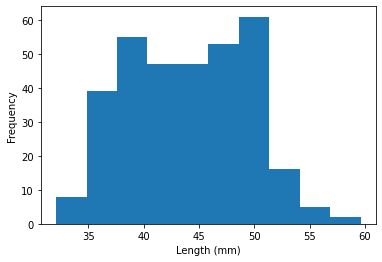

In [22]:
ax = (
    df["bill_length_mm"]
    .plot(kind="hist")
)
ax.set_xlabel("Length (mm)")
ax.set_title("Bill distribution")

### Exercise

Plot a histogram of the Penguin's bill depth.  

Text(0.5, 0, 'Depth (mm)')

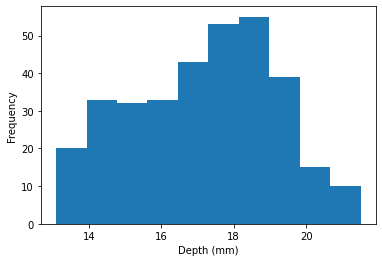

In [28]:
ax= df["bill_depth_mm"].plot(kind="hist")
ax.set_xlabel("Depth (mm)")

## Groupby

One very powerful technique to work on data is to split it into different groups, applying a function on each group and then combining the results of each operation again.  
Pandas has a function called `groupby` which can be used for this.  

In the example below, we will 

1. group the Penguins by their sex
2. select the bill length column
3. calculate the *mean value* of that column
4. plot the two mean values as a bar plot

In this way you can show if there are differences *between the two groups*


<AxesSubplot:xlabel='sex', ylabel='Bill length'>

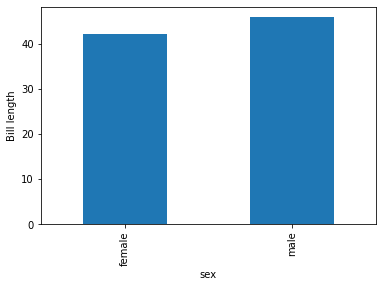

In [29]:
(
    df.groupby(df["sex"])
    ["bill_length_mm"]
    .mean()
    .plot(kind="bar", ylabel="Bill length")
)


### Exercise

Group the Penguins by their sex and calculate the mean flipper length of each group.  
Plot the results as a bar plot.  

<AxesSubplot:xlabel='sex', ylabel='Flipper Length (mm)'>

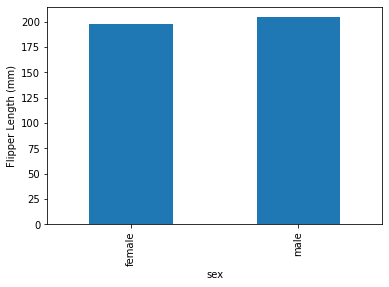

In [31]:

(
    df
    .groupby(df["sex"])
    ["flipper_length_mm"]
    .mean()
    .plot(kind="bar", ylabel="Flipper Length (mm)")
)


In [32]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<AxesSubplot:xlabel='island', ylabel='Body Mass (g)'>

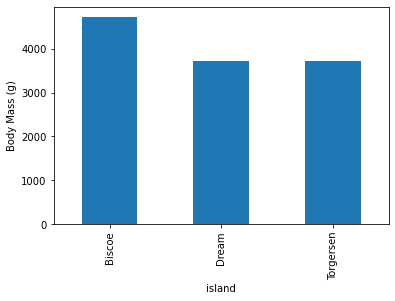

In [38]:
df.groupby(df["island"])["body_mass_g"].mean().plot(kind="bar", ylabel ="Body Mass (g)")


<AxesSubplot:xlabel='species', ylabel='Body Mass (g)'>

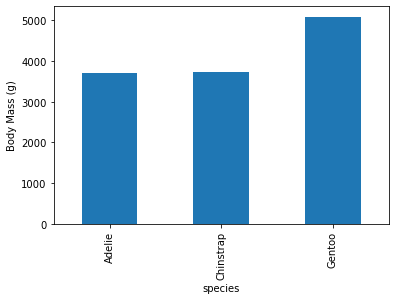

In [39]:
df.groupby(df["species"])["body_mass_g"].mean().plot(kind="bar", ylabel = "Body Mass (g)")

<AxesSubplot:xlabel='year', ylabel='Bill Length (mm'>

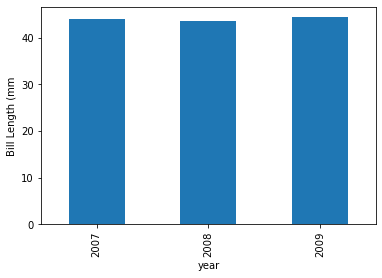

In [40]:
df.groupby(df["year"])["bill_length_mm"].mean().plot(kind="bar", ylabel = "Bill Length (mm")

In [46]:
print(df["bill_length_mm"].max())
print(df["bill_depth_mm"].max())
print(df.groupby("sex").max())


59.6
21.5
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex                                                                           
female  Gentoo  Torgersen            58.0           20.7              222.0   
male    Gentoo  Torgersen            59.6           21.5              231.0   

        body_mass_g  year  
sex                        
female       5200.0  2009  
male         6300.0  2009  


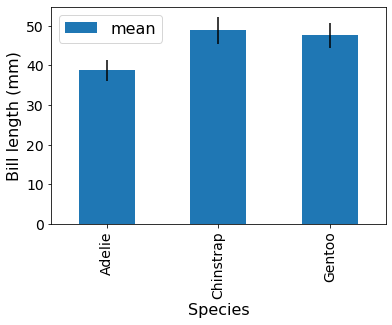

In [69]:
a = df.groupby(df["species"])["bill_length_mm"].agg(["mean", "std"])
ax = a.plot(kind="bar", yerr="std", fontsize= 14)
ax.set_ylabel("Bill length (mm)",fontdict={'fontsize':16})
ax.set_xlabel("Species", fontdict={'fontsize':16})
ax.legend(loc="upper left", fontsize=16)

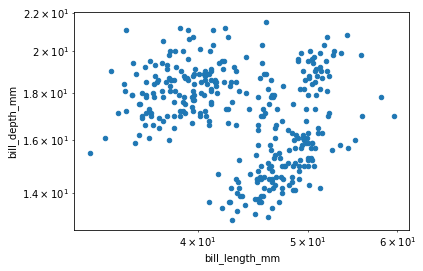

In [97]:
import numpy as np

dfnew= df[["bill_depth_mm", "bill_length_mm"]]
# dfnew[["log_depth","log_length"]] = np.log10(dfnew[["bill_depth_mm", "bill_length_mm"]])
# dfnew

ax = df.plot(kind="scatter", x="bill_length_mm", y="bill_depth_mm")
ax.set_xscale("log")
ax.set_yscale("log")

### Exercise

Explore the data set and try to find interesting patterns  

A few questions to get you started

- What is the mean body mass per island?  
- What is the mean body mass per species?  
- Has the mean bill length increased in the last years?

Don't let your investigations be limited to mean values either.  
Here are some other useful functions

| name  | desc    | 
| ---   | ---     |
| `max` | maximum | 
| `min` | minimum |
| `median` |  |
| `std` | standard deviation |
| `var` | variance |
| `sum` |  |
| `prod` | product |

## Further learning

Documentation

- [numpy documentation](https://numpy.org/doc/stable/user/index.html#user)
- [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html)
- [matplotlib documentation](https://matplotlib.org/stable/index.html)

Further packages

- [seaborn](https://seaborn.pydata.org/): package built on top of matplotlib for statistical plots
- [SciPy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide): advanced scientific computing library
- [statsmodels](https://www.statsmodels.org/stable/index.html): statistical models
- [scikit-learn](https://scikit-learn.org/stable/): machine learning library
- [PyTorch](https://pytorch.org/docs/stable/index.html): deep learning library
- [tensorflow](https://www.tensorflow.org/tutorials): deep learning library
- [Keras](https://keras.io/): deep learning library 
- [aesara](https://github.com/aesara-devs/aesara) (used to be Theano): symbolic maths on multi-dimensional arrays
- [JAX](https://github.com/google/jax): Composable transformations of Python & numpy on GPUs 

Books

- [Jake VanderPlas - Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Wes McKinnery - Python for Data Analysis](https://wesmckinney.com/book/)